In [82]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical

print(tf.__version__)
print(tf.config.list_physical_devices())

2.12.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [83]:
#setup folder where you will save logs for tensorflow 
root_logdir = os.path.join(os.curdir, "logs_ML2_ProjectML2_")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [104]:
# Pfad zum Bilderordner
image_folder = "Data/Baggages"
num_classes = 15

# Funktion zum Laden der Bilder aus dem Ordner
def load_images_from_subfolders(folder, target_size=(128, 128)):
    images = []
    labels = []
    for subfolder in os.listdir(folder):
        subfolder_path = os.path.join(folder, subfolder)
        if os.path.isdir(subfolder_path):
            for filename in os.listdir(subfolder_path):
                img_path = os.path.join(subfolder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    resized_img = cv2.resize(img, target_size)
                    images.append(resized_img)
                    labels.append(subfolder)  # Ordnername als Label verwenden
    return images, labels

# Bilder aus dem Ordner laden und verkleinern
images, labels = load_images_from_subfolders(image_folder)
# Konvertiere die Bilder und Labels in Numpy-Arrays
images_array = np.array(images)
labels_array = np.array(labels)

print(labels)

['B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0001', 'B0002', 'B0002', 'B0002', 'B0002', 'B0002', 'B0002', 'B0002', 'B0002', 'B0002', 'B0003', 'B0003', 'B0003', 'B0003', 'B0003', 'B0003', 'B0003', 'B0003', 'B0003', 'B0003', 'B0004', 'B0004', 'B0004', 'B0004', 'B0004', 'B0004', 'B0004', 'B0004', 'B0004', 'B0005', 'B0005', 'B0005', 'B0005', 'B0005', 'B0005', 'B0005', 'B0005', 'B0005', 'B0005', 'B0006', 'B0006', 'B0006', 'B0006', 'B0006', 'B0006', 'B0006', 'B0006', 'B0006', 'B0006', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0007', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 'B0008', 

In [108]:
print(len(images_array))
print(len(labels_array))
# Erstelle das label_to_id Mapping
label_to_id = {label: idx + 1 for idx, label in enumerate(sorted(set(labels_array)))}

# Konvertiere die Labels in numerische Werte
labels_numeric = [label_to_id[label] for label in labels_array]

# Speichere die numerischen Labels im labels_array
labels_array = np.array(labels_numeric)
print(labels_array)
print(len(labels_array))


9700
9700
[ 1  1  1 ... 82 82 82]
9700


In [54]:
# Tabelle mit Informationen zu den Labels (ersetze dies mit den tatsächlichen Informationen aus der Tabelle)
table = [
    {"Series": "B0001-B0006","Description": "Pen case with several objects"},
    {"Series": "B0007","Description": "Razor blade"},
    {"Series": "B0008", "Description": "Knife"},
    {"Series": "B0009–B0043", "Description": "Backpack with handgun and objects"},
    {"Series": "B0044", "Description": "Backpack with handgun"},
    {"Series": "B0045", "Description": "Pen case"},
    {"Series": "B0046–B0048", "Description": "Backpack with handguns, shuriken, razor blades"},
    {"Series": "B0049–B0051", "Description": "Handguns, shuriken, and blades"},
    {"Series": "B0052–B0054", "Description": "Shuriken"},
    {"Series": "B0055–B0057", "Description": "single objects"},
    {"Series": "B0058", "Description": "clips, springs, razor blades and others"},
    {"Series": "B0059", "Description": "clips, springs, razor blades and others"},
    {"Series": "B0060", "Description": "Shuriken"},
    {"Series": "B0061–B0073", "Description": "Razor blade in cases"},
    {"Series": "B0074", "Description": "door key"},
    {"Series": "B0075–B0077", "Description": "knife"},
]


{'B0001-B0006': 1, 'B0007': 2, 'B0008': 3, 'B0009–B0043': 4, 'B0044': 5, 'B0045': 6, 'B0046–B0048': 7, 'B0049–B0051': 8, 'B0052–B0054': 9, 'B0055–B0057': 10, 'B0058': 11, 'B0059': 12, 'B0060': 13, 'B0061–B0073': 14, 'B0074': 15, 'B0075–B0077': 16}


In [109]:
table = [
    {"id": list(range(0, 6)), "Description": "Pen case with several objects","label_id":1},
    {"id": 6, "Description": "Razor blade","label_id":2},
    {"id": list(range(7, 75)), "Description": "Knife","label_id":3},
    {"id": list(range(8, 43)), "Description": "Backpack with handgun and objects","label_id":4},
    {"id": 43, "Description": "Backpack with handgun","label_id":5},
    {"id": list(range(45, 48)), "Description": "Backpack with handguns, shuriken, razor blades","label_id":6},
    {"id": list(range(48, 51)), "Description": "Handguns, shuriken, and blades","label_id":7},
    {"id": list(range(51, 54)), "Description": "Shuriken","label_id":8},
    {"id": list(range(54, 57)), "Description": "single objects","label_id":9},
    {"id": 57, "Description": "clips, springs, razor blades and others","label_id":10},
    {"id": 58, "Description": "clips, springs, razor blades and others","label_id":11},
    {"id": 59, "Description": "Shuriken","label_id":12},
    {"id": list(range(60, 73)), "Description": "Razor blade in cases","label_id":13},
    {"id": 73, "Description": "door key","label_id":14},
    {"id": list(range(75, 82)), "Description": "other","label_id":15},
]

# labels_array = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

# Erstelle das label_to_id Mapping
label_to_id = {entry["Description"]: entry["label_id"] for entry in table}

# labels_array = np.array([class_indices[label] for label in labels_numeric])
print(label_to_id)
# valid_labels = labels[:2]
# train_labels = labels[2:]



{'Pen case with several objects': 1, 'Razor blade': 2, 'Knife': 3, 'Backpack with handgun and objects': 4, 'Backpack with handgun': 5, 'Backpack with handguns, shuriken, razor blades': 6, 'Handguns, shuriken, and blades': 7, 'Shuriken': 12, 'single objects': 9, 'clips, springs, razor blades and others': 11, 'Razor blade in cases': 13, 'door key': 14, 'other': 15}


In [110]:
# Konvertiere die Bilder und Labels in Numpy-Arrays
images_array = np.array(images)
# Erstelle das label_to_id Mapping
#label_to_id = {label: idx for idx, label in enumerate(sorted(set(labels)))}

# Erstelle das label_to_id Mapping
label_to_id = {}
for entry in table:
    label_id = entry["label_id"]
    description = entry["Description"]
    if isinstance(entry["id"], int):
        label_to_id[entry["id"]] = label_id
    elif isinstance(entry["id"], list):
        for id_val in entry["id"]:
            label_to_id[id_val] = label_id

# Konvertiere die Labels in numerische Werte
labels_numeric = [label_to_id[label] for label in labels_array]
# Speichere die numerischen Labels im labels_array
labels_array = np.array(labels_numeric)
# labels_array = np.array(list(label_to_id.values()))
print(labels_array)
print(len(labels_array))
# assert np.max(labels_array) <= num_classes - 1, "Labels are outside the valid range"
# Aufteilen der Daten in Trainings-, Validierungs- und Testdaten
valid_images, train_images = images_array[:2], images_array[2:]
valid_labels, train_labels = labels_array[:2], labels_array[2:]



KeyError: 82

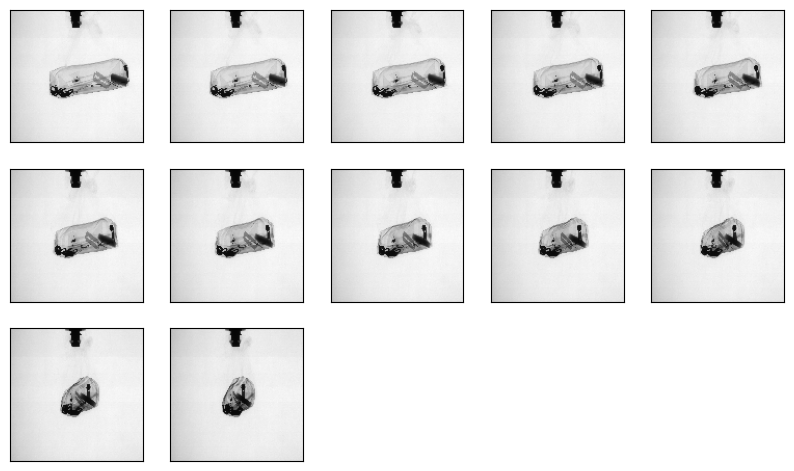

In [58]:
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    # plt.xlabel(labels[train_labels[i][0]])
plt.show()

In [96]:
print('training ds shape:', train_images.shape)
print('validation ds shape:', valid_images.shape)
# print('test ds shape:', test_images.shape)

training ds shape: (9698, 128, 128, 3)
validation ds shape: (2, 128, 128, 3)


In [97]:
train_images = train_images / 255.0
valid_images = valid_images / 255.0
# test_images = test_images / 255.0

In [98]:
run_logdir = get_run_logdir()

#create keras Tensorboard callback and early stopping_callback
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)
earlystopping_cb  = tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 flatten_4 (Flatten)         (None, 524288)            0         
                                                                 
 dense_4 (Dense)             (None, 15)                7864335   
                                                                 
Total params: 7,865,231
Trainable params: 7,865,231
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics='accuracy')

In [101]:
model.fit(train_images, train_labels, epochs=5, validation_data=(valid_images, valid_labels), callbacks=[tensorboard_cb, earlystopping_cb])

ValueError: Data cardinality is ambiguous:
  x sizes: 9698
  y sizes: 80
Make sure all arrays contain the same number of samples.